Задание 1

#### 1) Как критики относятся к спортивным играм?

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('vgsales.csv',encoding='utf-8')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df[df.Genre == 'Sports'].Critic_Score.mean()

72.03975799481418

In [30]:
# 1. Предположим, что критики относятся к играм хорошо, если их оценка больше 50 и плохо, если меньше или равна 50
# H0: средняя оценка критиков <=50% (им не особо нравятся такие игры)
# H1 : средняя оценка критиков >50% (им нравятся спортивные игры)

In [31]:
### пусть уровень значимость будет 5%

In [32]:
import scipy.stats as st
alpha = 0.05
result = st.ttest_1samp(df[df.Genre == 'Sports'].Critic_Score.dropna(), 50.0)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее больше 50, спортивные игры нравятся критикам')
else:
    print('Не отвергаем нулевую гипотезу, спортивные игры не нравится критикам')

Ttest_1sampResult(statistic=54.26280650160136, pvalue=4.1215e-320)
Отвергаем нулевую гипотезу, среднее больше 50, спортивные игры нравятся критикам


In [33]:
# параметр альтернатив у меня так и не заработал, как я не обновляла бибилиотеки и даже анакоду переустановила, 
# но statistic положительный поэтому делаем вывод, что средняя оценка все таки выше 


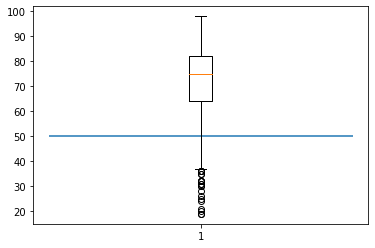

In [54]:
# покажем это графически
Critic_Score = list(df[df.Genre == 'Sports'].Critic_Score.dropna()) 
plt.boxplot(Critic_Score)
plt.hlines(50,0,2)
plt.show()


#### 2) Критикам нравятся больше игры на PC или на PS4?

In [93]:
PC = df[df.Platform == 'PC'].Critic_Score.dropna()
PS4 = df[df.Platform == 'PS4'].Critic_Score.dropna()

In [94]:
#H0: критики одинаково относятся к PC и PS4
#H1: критикам какие-то игры нравится больше
### пусть уровень значимость будет 5%

In [95]:
result = st.ttest_ind(PC, PS4)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, у критиков есть предпочтения')
else:
    print('Не отвергаем нулевую гипотезу, критики одинаково относятся к PC и PS4')

Ttest_indResult(statistic=4.02987269954443, pvalue=6.060122652795504e-05)
Отвергаем нулевую гипотезу, у критиков есть предпочтения


<AxesSubplot:xlabel='Platform', ylabel='Critic_Score'>

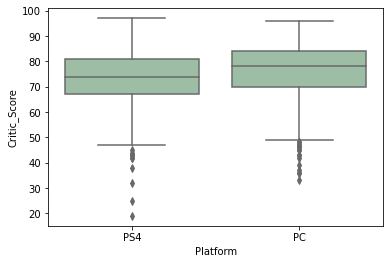

In [99]:
# так как statistic>0 можно сделать вывод, что критики предпочитают игры на компьютере, покажем это визуально
df_mid = df.loc[((df.Platform == 'PC') | (df.Platform == 'PS4')) , ['Platform', 'Critic_Score']].dropna()
sns.boxplot(x='Platform', y='Critic_Score', data=df_mid, color='#99c2a2')

#### 3) Критикам больше нравятся стрелялки или стратегии?

In [104]:
df.groupby(df.Genre).count()

,Name,Platform,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Genre,,,,,,,,,,,,,,,
Action,3210,3210,3152,3204,3210,3210,3210,3210,3210,1771,1771,1712,1712,2084,2048
Adventure,1237,1237,1227,1234,1237,1237,1237,1237,1237,304,304,280,280,441,418
Fighting,822,822,811,820,822,822,822,822,822,384,384,374,374,414,412
Misc,1672,1672,1647,1646,1672,1672,1672,1672,1672,488,488,406,406,826,822
Platform,851,851,842,850,851,851,851,851,851,466,466,401,401,534,534
Puzzle,554,554,543,554,554,554,554,554,554,211,211,119,119,324,319
Racing,1225,1225,1202,1224,1225,1225,1225,1225,1225,723,723,623,623,862,850
Role-Playing,1424,1424,1407,1423,1424,1424,1424,1424,1424,668,668,673,673,717,706
Shooter,1250,1250,1224,1248,1250,1250,1250,1250,1250,884,884,864,864,961,955


In [105]:
sho = df[df.Genre == 'Shooter'].Critic_Score.dropna()
stra = df[df.Genre == 'Strategy'].Critic_Score.dropna()

In [106]:
#H0: критики одинаково относятся к стрелялкам и стратегиям
#H1: критикам какие-то игры нравится больше
### пусть уровень значимость будет 5%

In [108]:
result = st.ttest_ind(sho,stra)
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, у критиков есть предпочтения')
else:
    print('Не отвергаем нулевую гипотезу, критики одинаково относятся к стрелялкам и стратегиям')

Ttest_indResult(statistic=-1.923923056469162, pvalue=0.05460700562357177)
Не отвергаем нулевую гипотезу, критики одинаково относятся к стрелялкам и стратегиям


Задание 2

In [321]:
dfm = pd.read_csv('spam.csv', sep='\n' , quotechar='"' )
dfm = dfm['Category,Message'].str.split(',',1,expand=True)

dfm.columns = ['Category','Message']


In [322]:
# приводим к нижнему регистру
dfm.Message =dfm.Message.str.lower()

In [323]:
# убираем спец символы
dfm = dfm.replace('[\W_]+',' ',regex=True)

In [328]:
# убираем стоп-слова
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

dfm['Message_without_stopwords'] = dfm['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
dfm

,Category,Message,Message_without_stopwords
0,ham,go until jurong point crazy available only in...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,nah i don t think he goes to usf he lives aro...,nah think goes usf lives around though
...,...,...,...
5569,spam,this is the 2nd time we have tried 2 contact ...,2nd time tried 2 contact u u 750 pound prize 2...
5570,ham,will ü b going to esplanade fr home,ü b going esplanade fr home
5571,ham,pity was in mood for that so any other sugges...,pity mood suggestions
5572,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...


In [329]:
# Леметизация
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
dfm['lemmatized_text'] = dfm['Message_without_stopwords'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()])) 
                                                                           
dfm


,Category,Message,Message_without_stopwords,lemmatized_text
0,ham,go until jurong point crazy available only in...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah i don t think he goes to usf he lives aro...,nah think goes usf lives around though,nah think go usf life around though
...,...,...,...,...
5569,spam,this is the 2nd time we have tried 2 contact ...,2nd time tried 2 contact u u 750 pound prize 2...,2nd time tried 2 contact u u 750 pound prize 2...
5570,ham,will ü b going to esplanade fr home,ü b going esplanade fr home,ü b going esplanade fr home
5571,ham,pity was in mood for that so any other sugges...,pity mood suggestions,pity mood suggestion
5572,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,guy bitching acted like interested buying some...


In [338]:
dfm['Category_b'] = dfm['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [330]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(dfm.lemmatized_text)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [400]:
import numpy as np
X = tfidf_matrix.values
y = dfm['Category_b'].values
indices = np.arange(dfm['Category_b'].count())

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [401]:
X_train, X_test, y_train, y_test, ind_train,ind_test = train_test_split(X, y,indices, test_size=0.30, random_state=42)

In [402]:
# модель логистической регрессии
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

In [438]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [439]:
model.score(X_test, y_test) # коэффициента детерминации высокий, модель получилась хорошая

0.9509862522414824

In [440]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1442    5]
 [  77  149]]


In [386]:
#Результат показывает, что у нас 1442+149 верных прогнозов и 77+5 ошибочных. Что неплохо совсем

In [435]:
result = pd.DataFrame([[dfm.iloc[index,1] for index in ind_test], y_test, y_pred]).T

In [436]:
result.columns = ['message','y_test','y_pred']


In [437]:
# неправильно классифицированные результаты
result[result.y_test!=result.y_pred]

,message,y_test,y_pred
26,kit strip you have been billed 150p netcollex ...,1,0
30,call germany for only 1 pence per minute call ...,1,0
35,all the lastest from stereophonics marley diz...,1,0
39,dear subscriber ur draw 4 100 gift voucher wil...,1,0
100,your unique user id is 1172 for removal send s...,1,0
...,...,...,...
1574,fantasy football is back on your tv go to sky...,1,0
1576,well done your 4 costa del sol holiday or 500...,1,0
1580,are you free now can i call now,0,1
1590,sms ac blind date 4u rodds1 is 21 m from aber...,1,0
